# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
load_dotenv()
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to C:\Users\William
[nltk_data]     Riera\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
# Read your api key environment variable
apiKey = os.getenv("NEWS_API_KEY")

In [5]:
# Create a newsapi client
from newsapi import NewsApiClient
newsApi = NewsApiClient(api_key=apiKey)

In [6]:
# Fetch the Bitcoin news articles
bitcoinArticles = newsApi.get_everything(q="bitcoin", language="en", sort_by="relevancy")

In [7]:
# Fetch the Ethereum news articles
ethereumArticles = newsApi.get_everything(q="ethereum", language="en", sort_by="relevancy")

In [8]:
# Create the Bitcoin sentiment scores DataFrame
btcSentimentScore = []

for article in bitcoinArticles["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btcSentimentScore.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
    except ArithmeticError:
        pass
    
#btcSentimentScore

In [9]:
#creating the btc dataframe so that results looks clean and understandable (do the same for eth)
btcDf = pd.DataFrame(btcSentimentScore)
colReorder = ["compound", "negative", "neutral", "positive", "text"]
btcDf = btcDf[colReorder]

In [10]:
btcDf

,compound,negative,neutral,positive,text
0,0.4404,0.000,0.923,0.077,"Rapper and entrepreneur Shawn Carter, better k..."
1,0.5267,0.000,0.876,0.124,A new study on bitcoin calls into question whe...
2,0.2960,0.074,0.792,0.134,By Joe TidyCyber reporter \r\nCryptocurrencies...
3,0.1027,0.046,0.867,0.087,(CNN)El Salvador has embraced Bitcoin like no ...
4,0.2023,0.000,0.940,0.060,"Stephen J. Dubner, Freakonomics Radio\r\nIn th..."
...,...,...,...,...,...
95,-0.5770,0.129,0.871,0.000,Critique: There are news reports all the time...
96,0.4019,0.000,0.930,0.070,"Elon Musk, CEO of Tesla and SpaceX, is being s..."
97,0.0000,0.000,1.000,0.000,What little is left of Meta's once-ambitous cr...
98,0.4019,0.000,0.909,0.091,Cybercriminals made off with $100 million in c...


In [11]:
# Create the Ethereum sentiment scores DataFrame
ethSentimentScore = []

for article in ethereumArticles["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethSentimentScore.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
    except ArithmeticError:
        pass
    
ethSentimentScore

[{'text': 'Sky Mavis, the developer of blockchain game Axie Infinity, says it will start reimbursing the victims of a $617 million hack that took place earlier this year. The attackers took $25.5 million in USD… [+1494 chars]',
  'compound': -0.7184,
  'positive': 0.0,
  'negative': 0.154,
  'neutral': 0.846},
 {'text': 'Jim Cramer, the CNBC host whos reportedly worth at least $150 million, thinks Gen Z is buying too many $14 margaritas at the bar he owns in Brooklyn. And while were all for giving millionaire baby bo… [+3789 chars]',
  'compound': 0.5106,
  'positive': 0.107,
  'negative': 0.0,
  'neutral': 0.893},
 {'text': 'Axie Infinity was the prime example of crypto gaming last year, when its play-to-earn formula helped it reach up to 2.7 million daily active users last November. But that all came crashing down in Ma… [+1604 chars]',
  'compound': 0.2263,
  'positive': 0.077,
  'negative': 0.0,
  'neutral': 0.923},
 {'text': 'The price of Ethereum has dropped below $1,250 while en

In [12]:
#create eth df and reorganize the columns
ethDf = pd.DataFrame(ethSentimentScore)

ethDf = ethDf[colReorder]

ethDf

,compound,negative,neutral,positive,text
0,-0.7184,0.154,0.846,0.000,"Sky Mavis, the developer of blockchain game Ax..."
1,0.5106,0.000,0.893,0.107,"Jim Cramer, the CNBC host whos reportedly wort..."
2,0.2263,0.000,0.923,0.077,Axie Infinity was the prime example of crypto ...
3,0.2732,0.000,0.937,0.063,"The price of Ethereum has dropped below $1,250..."
4,0.3182,0.000,0.941,0.059,The ability to conduct external transfers on P...
...,...,...,...,...,...
95,-0.6808,0.177,0.778,0.045,Seth Green's stolen Bored Ape NFT is his again...
96,0.4404,0.000,0.914,0.086,The cryptocurrency industry is talking a lot a...
97,0.0000,0.000,1.000,0.000,What happened \r\nThe world of cryptocurrency ...
98,0.0000,0.000,1.000,0.000,"What happened\r\nToday, investors appear inten..."


In [13]:
# Describe the Bitcoin Sentiment
btcDf.describe()

,compound,negative,neutral,positive
count,100.000000,100.000000,100.000000,100.000000
mean,-0.004430,0.066370,0.869320,0.064370
std,0.433822,0.071953,0.085563,0.065477
min,-0.948500,0.000000,0.628000,0.000000
25%,-0.312300,0.000000,0.814750,0.000000
50%,0.000000,0.064000,0.867500,0.064000
75%,0.361200,0.106000,0.926250,0.109250
max,0.865500,0.372000,1.000000,0.269000


In [14]:
# Describe the Ethereum Sentiment
ethDf.describe()

,compound,negative,neutral,positive
count,100.000000,100.000000,100.000000,100.000000
mean,0.037120,0.063510,0.862150,0.074310
std,0.476834,0.069653,0.087211,0.073378
min,-0.948500,0.000000,0.628000,0.000000
25%,-0.381800,0.000000,0.817750,0.000000
50%,0.000000,0.060500,0.863000,0.063500
75%,0.435000,0.092500,0.924250,0.127250
max,0.877900,0.372000,1.000000,0.265000


### Questions:

Q: Which coin had the highest mean positive score?

A: Btc with 0.058

Q: Which coin had the highest compound score?

A: Btc with 0.750

Q. Which coin had the highest positive score?

A: Btc with 0.202

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [15]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [16]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))
#stopW
# Expand the default stopwords list if necessary
stopWordsExtra = {}
sw = sw.union(stopWordsExtra)
sw

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [17]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text) 
   
    # Create a tokenized list of the words
    tknzdWrds = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem  = [lemmatizer.lemmatize(word) for word in tknzdWrds]
   
    # Convert the words to lowercase
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw]
   
    return tokens

In [18]:
# Create a new tokens column for Bitcoin
btcDf['tokens'] = btcDf.text.apply(tokenizer)
btcDf

,compound,negative,neutral,positive,text,tokens
0,0.4404,0.000,0.923,0.077,"Rapper and entrepreneur Shawn Carter, better k...","[rapper, entrepreneur, shawn, carter, better, ..."
1,0.5267,0.000,0.876,0.124,A new study on bitcoin calls into question whe...,"[new, study, bitcoin, call, question, whether,..."
2,0.2960,0.074,0.792,0.134,By Joe TidyCyber reporter \r\nCryptocurrencies...,"[joe, tidycyber, reporter, cryptocurrencies, c..."
3,0.1027,0.046,0.867,0.087,(CNN)El Salvador has embraced Bitcoin like no ...,"[cnnel, salvador, ha, embraced, bitcoin, like,..."
4,0.2023,0.000,0.940,0.060,"Stephen J. Dubner, Freakonomics Radio\r\nIn th...","[stephen, j, dubner, freakonomics, radioin, in..."
...,...,...,...,...,...,...
95,-0.5770,0.129,0.871,0.000,Critique: There are news reports all the time...,"[critiquethere, news, report, time, bitcoin, g..."
96,0.4019,0.000,0.930,0.070,"Elon Musk, CEO of Tesla and SpaceX, is being s...","[elon, musk, ceo, tesla, spacex, sued, billion..."
97,0.0000,0.000,1.000,0.000,What little is left of Meta's once-ambitous cr...,"[little, left, metas, onceambitouscryptocurren..."
98,0.4019,0.000,0.909,0.091,Cybercriminals made off with $100 million in c...,"[cybercriminals, made, million, cryptocurrency..."


In [19]:
# Create a new tokens column for Ethereum
ethDf['tokens'] = ethDf.text.apply(tokenizer)
ethDf

,compound,negative,neutral,positive,text,tokens
0,-0.7184,0.154,0.846,0.000,"Sky Mavis, the developer of blockchain game Ax...","[sky, mavis, developer, blockchain, game, axie..."
1,0.5106,0.000,0.893,0.107,"Jim Cramer, the CNBC host whos reportedly wort...","[jim, cramer, cnbc, host, reportedly, worth, l..."
2,0.2263,0.000,0.923,0.077,Axie Infinity was the prime example of crypto ...,"[axie, infinity, wa, prime, example, crypto, g..."
3,0.2732,0.000,0.937,0.063,"The price of Ethereum has dropped below $1,250...","[price, ethereum, ha, dropped, energy, price, ..."
4,0.3182,0.000,0.941,0.059,The ability to conduct external transfers on P...,"[ability, conduct, external, transfer, paypals..."
...,...,...,...,...,...,...
95,-0.6808,0.177,0.778,0.045,Seth Green's stolen Bored Ape NFT is his again...,"[seth, greens, stolen, bored, ape, nft, ending..."
96,0.4404,0.000,0.914,0.086,The cryptocurrency industry is talking a lot a...,"[cryptocurrency, industry, talking, lot, proof..."
97,0.0000,0.000,1.000,0.000,What happened \r\nThe world of cryptocurrency ...,"[happenedthe, world, cryptocurrency, something..."
98,0.0000,0.000,1.000,0.000,"What happened\r\nToday, investors appear inten...","[happenedtoday, investor, appear, intent, disc..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [20]:
from collections import Counter
from nltk import ngrams

In [21]:
# Generate the Bitcoin N-grams where N=2
btcNgram = ngrams(tokenizer(btcDf.text.str.cat()), n=2)

btcNgramCount = Counter(btcNgram)

In [22]:
print(dict(btcNgramCount))

{('rapper', 'entrepreneur'): 1, ('entrepreneur', 'shawn'): 1, ('shawn', 'carter'): 1, ('carter', 'better'): 1, ('better', 'known'): 1, ('known', 'jayz'): 1, ('jayz', 'bringing'): 1, ('bringing', 'bitcoin'): 1, ('bitcoin', 'place'): 1, ('place', 'grew'): 1, ('grew', 'thursday'): 1, ('thursday', 'jayz'): 1, ('jayz', 'former'): 1, ('former', 'twitter'): 1, ('twitter', 'ceo'): 1, ('ceo', 'jack'): 1, ('jack', 'dorsey'): 1, ('dorsey', 'announced'): 1, ('announced', 'launch'): 1, ('launch', 'bitcoin'): 1, ('bitcoin', 'charsa'): 1, ('charsa', 'new'): 1, ('new', 'study'): 1, ('study', 'bitcoin'): 1, ('bitcoin', 'call'): 1, ('call', 'question'): 1, ('question', 'whether'): 1, ('whether', 'digital'): 1, ('digital', 'currency'): 2, ('currency', 'truly'): 1, ('truly', 'decentralized'): 1, ('decentralized', 'anonymous'): 1, ('anonymous', 'biggest'): 1, ('biggest', 'devotee'): 1, ('devotee', 'would'): 1, ('would', 'believe'): 1, ('believe', 'researchers'): 1, ('researchers', 'baylor'): 1, ('baylor', 

In [23]:
# Generate the Ethereum N-grams where N=2
ethNgram = ngrams(tokenizer(ethDf.text.str.cat()), n=2)
ethNgramCount = Counter(ethNgram)
print(dict(ethNgramCount))

{('sky', 'mavis'): 1, ('mavis', 'developer'): 1, ('developer', 'blockchain'): 1, ('blockchain', 'game'): 1, ('game', 'axie'): 1, ('axie', 'infinity'): 1, ('infinity', 'say'): 1, ('say', 'start'): 1, ('start', 'reimbursing'): 1, ('reimbursing', 'victim'): 1, ('victim', 'million'): 1, ('million', 'hack'): 1, ('hack', 'took'): 1, ('took', 'place'): 1, ('place', 'earlier'): 1, ('earlier', 'year'): 1, ('year', 'attacker'): 1, ('attacker', 'took'): 1, ('took', 'million'): 1, ('million', 'usd'): 1, ('usd', 'charsjim'): 1, ('charsjim', 'cramer'): 1, ('cramer', 'cnbc'): 1, ('cnbc', 'host'): 1, ('host', 'reportedly'): 1, ('reportedly', 'worth'): 1, ('worth', 'least'): 1, ('least', 'million'): 1, ('million', 'think'): 1, ('think', 'gen'): 1, ('gen', 'z'): 1, ('z', 'buying'): 1, ('buying', 'many'): 1, ('many', 'margarita'): 1, ('margarita', 'bar'): 1, ('bar', 'owns'): 1, ('owns', 'brooklyn'): 1, ('brooklyn', 'giving'): 1, ('giving', 'millionaire'): 1, ('millionaire', 'baby'): 1, ('baby', 'bo'): 1,

In [24]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [25]:
# Use token_count to get the top 10 words for Bitcoin
btcTopTen = token_count(tokenizer(btcDf.text.str.cat()), int(input()))
btcTopTen

In [ ]:
# Use token_count to get the top 10 words for Ethereum
ethTopTen = token_count(tokenizer(ethDf.text.str.cat()), int(input()))

ethTopTen

[('cryptocurrency', 11),
 ('bitcoin', 7),
 ('ha', 6),
 ('world', 5),
 ('digital', 4),
 ('nft', 4),
 ('biggest', 4),
 ('reuters', 4),
 ('market', 4),
 ('char', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

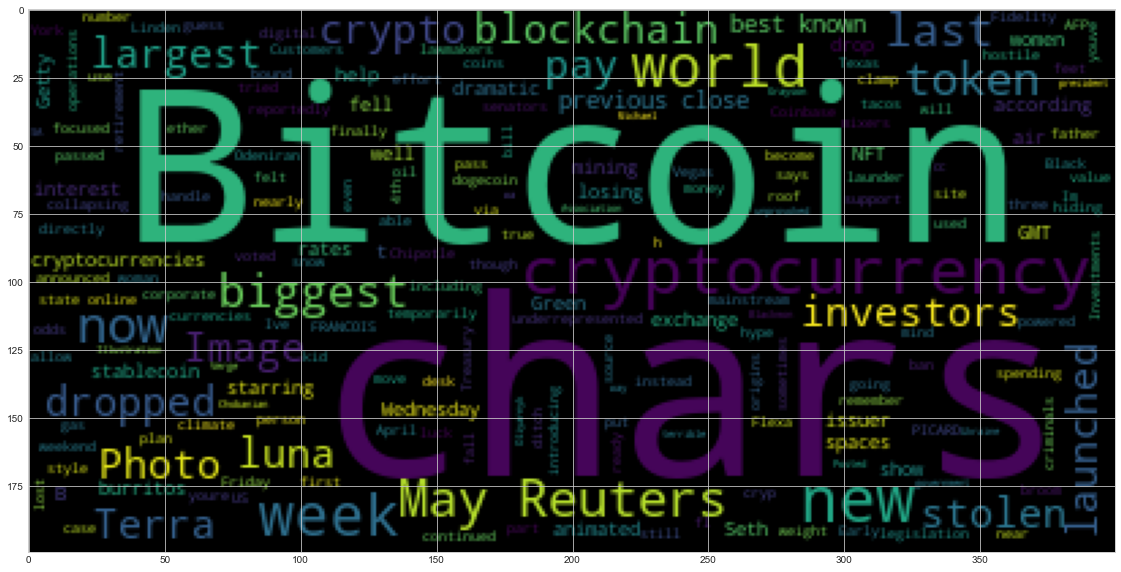

In [ ]:
# Generate the Bitcoin word cloud
btcWc = WordCloud().generate(btcDf.text.str.cat())

plt.imshow(btcWc)

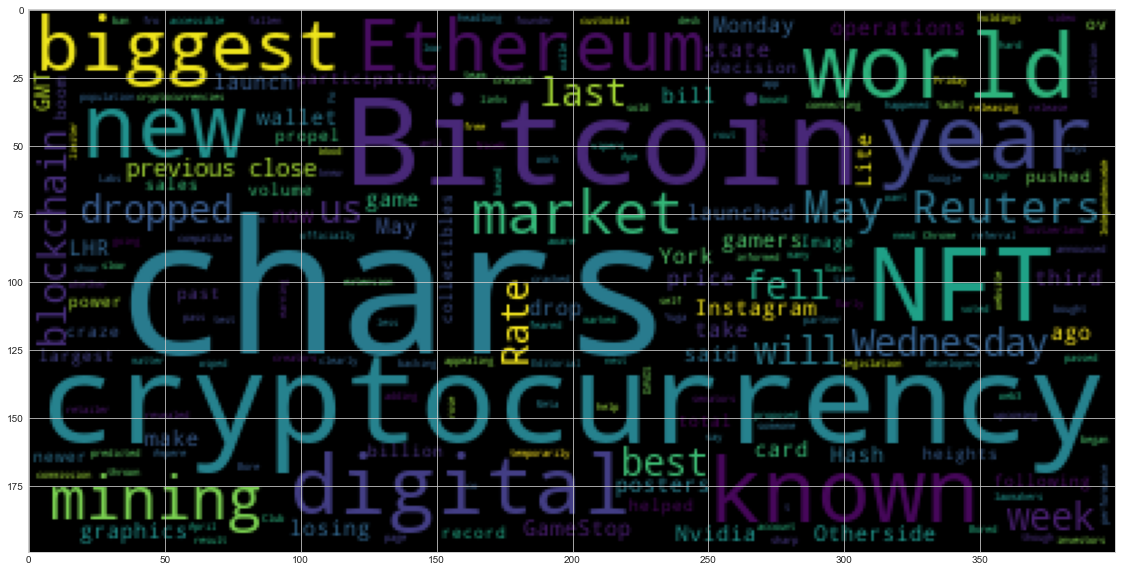

In [ ]:
# Generate the Ethereum word cloud
ethWc = WordCloud().generate(ethDf.text.str.cat())

plt.imshow(ethWc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [ ]:
import spacy
from spacy import displacy

In [ ]:
# Download the language model for SpaCy
#!python -m spacy download en_core_web_sm

In [ ]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [ ]:
# Concatenate all of the Bitcoin text together
btcCombined = btcDf.text.str.cat()
#btcCombined

"New York lawmakers have passed a bill\r\n that would temporarily ban new bitcoin\r\n mining operations. Early on Friday, state senators voted 36-27 to pass the legislation. It's now bound for the desk of… [+2036 chars]Now, even though there are a number of women-focused crypto spaces, Odeniran says women are still underrepresented. Ive been in spaces where Im the only Black person, or the only woman, or the only B… [+3828 chars]A Bitcoin mining site powered by otherwise lost gas from an oil well near Linden, Texas, on April 4th, 2022. | Photo by FRANCOIS PICARD/AFP via Getty Images\r\n\n \n\n Of all the corporate climate hype fl… [+6544 chars]You can now reportedly pay for your burritos and tacos with Bitcoin and other digital currencies, in case you don't mind spending your coins directly instead of going through exchanges first. Flexa h… [+1428 chars]Image source, Getty Images\r\nThe value of Bitcoin continued to fall over the weekend as it dropped below $34,000 (£27,630), according

In [ ]:
# Run the NER processor on all of the text
btcNer = nlp(btcCombined)

# Add a title to the document
btcNer.user_data['title'] = "Btc NER"

#btcNer.user_data

{'title': 'Btc NER'}

In [ ]:
# Render the visualization
displacy.render(btcNer,style='ent')

In [ ]:
# List all Entities
for entity in btcNer.ents:
    print(entity.text, entity.label_)

New York GPE
Friday DATE
36-27 CARDINAL
Odeniran GPE
Linden GPE
Texas GPE
April 4th, 2022 DATE
Photo PERSON
FRANCOIS PICARD/AFP ORG
Getty Images ORG
first ORDINAL
Getty Images
 ORG
the weekend DATE
34,000 MONEY
27,630 MONEY
Coinbase PERSON
nearly three feet QUANTITY
Chipotle ORG
Last week DATE
Fidelity Investments ORG
the US Treasury ORG
Grayson Blackmon PERSON
Oliyarnyk / CC-BY-SA-4.0 ORG
Michael Chobanian PERSON
the Blockchain Association of Ukraine ORG
Bitcoin ORG
Gucci handbag PERSON
week DATE
Kristy Kilburn PERSON
May 11 DATE
Reuters ORG
7.23% PERCENT
28,758.29 MONEY
GMT WORK_OF_ART
Wednesday DATE
2,241.68 MONEY
40.4% PERCENT
+361 chars]May 4 ORG
Reuters ORG
5.7% PERCENT
39,862.84 MONEY
Wednesday DATE
2,102.94 MONEY
20.9% PERCENT
year DATE
9 CARDINAL
Reuters ORG
7.81% PERCENT
31,333.41 MONEY
GMT WORK_OF_ART
Monday DATE
2,655.98 MONEY
35% PERCENT
last July DATE
33,000 MONEY
the week DATE
last week DATE
Fed ORG
Mexican NORP
North London LOC
a few weeks ago DATE
+2779 chars]May ORG
2

---

### Ethereum NER

In [ ]:
# Concatenate all of the Ethereum text together
ethCombined = ethDf.text.str.cat()

In [ ]:
# Run the NER processor on all of the text
ethNer = nlp(ethCombined)
# Add a title to the document
ethNer.user_data['title'] = 'Eth Ner'

#ethNer.user_data

{'title': 'Eth Ner'}

In [ ]:
# Render the visualization
displacy.render(ethNer, style='ent')

In [ ]:
# List all Entities
for entity in ethNer.ents:
    print(entity.text, entity.label_)

Meta ORG
Instagram ORG
US GPE
Instagram ORG
chars]GameStop ORG
web3 LOC
Yacht Club ORG
Yuga Labs PERSON
Otherside NFT LAW
April 30 DATE
NFT ORG
Ethereum ORG
Monday DATE
Google Chrome PRODUCT
chars]New York GPE
Friday DATE
36-27 CARDINAL
Switzerland GPE
May 25 DATE
Reuters ORG
Gavin Wood PERSON
IndependenceWe NORP
chars]40 days ago DATE
47,454 MONEY
34,007 MONEY
28%.About a third CARDINAL
this week DATE
Nvidia PERSON
Ampere Lite Hash Rate WORK_OF_ART
LHR ORG
Ethereum ORG
4 CARDINAL
Reuters ORG
5.7% PERCENT
39,862.84 MONEY
Wednesday DATE
2,102.94 MONEY
20.9% PERCENT
year DATE
Reuters ORG
7.23% PERCENT
28,758.29 MONEY
GMT WORK_OF_ART
Wednesday DATE
2,241.68 MONEY
40.4% PERCENT
+361 chars]May 9 ORG
Reuters ORG
7.81% PERCENT
31,333.41 MONEY
GMT WORK_OF_ART
Monday DATE
2,655.98 MONEY
35% PERCENT
8 CARDINAL
Nvidia ORG
LHR ORG
last year  DATE
last July DATE
33,000 MONEY
the week DATE
last week DATE
Fed ORG
the past few years DATE
NFT ORG
$29 billion MONEY
several years ago DATE
Getty Images
 O

---